Q1. What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.

>  **Artificial Intelligence (AI)**

* The overarching field focused on creating machines capable of performing tasks that typically require human intelligence, such as decision-making, problem-solving, and understanding language.

* It includes various approaches, both traditional rule-based systems and modern techniques like machine learning.

> **Machine Learning (ML)**

* A subset of AI that enables systems to learn and improve from data without being explicitly programmed for every scenario.

* It uses algorithms to analyze large datasets, identify patterns, and make predictions or decisions based on what it has learned.

> **Deep Learning (DL)**

* A specialized type of machine learning that uses multi-layered artificial neural networks to learn from vast amounts of data.

* It is inspired by the structure of the human brain and is particularly effective at modeling complex patterns in unstructured data like images and text.

> **Data Science (DS)**

* A broad, interdisciplinary field that uses scientific methods, processes, algorithms, and systems to extract knowledge and insights from both structured and unstructured data.

* It is an end-to-end process that includes data collection, cleaning, analysis, and interpretation, often using AI and ML as tools to build predictive models and derive meaningful conclusions.
---

Q2. Explain overfitting and underfitting in ML. How can you detect and prevent
them?

> **Overfitting:**

* Overfitting occurs when a model learns the training data too well, including its noise and specific patterns, rather than the underlying general relationships. This results in excellent performance on the training data but poor performance on new, unseen data. The model essentially memorizes the training examples instead of learning generalizable rules.

> **Underfitting:**

* Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It fails to learn the relationships between features and the target variable, resulting in poor performance on both the training and test data. The model is too basic to represent the complexity of the data.

> **Detection:**

* Evaluate on Training and Test Sets:

   * Overfitting: High accuracy/low error on the training set, but significantly lower accuracy/higher error on the test set.

   * Underfitting: Low accuracy/high error on both the training and test sets.

* **Learning Curves:** Plotting the training and validation (or test) error/accuracy as a function of the training set size or number of training iterations.

  * Overfitting: Training error decreases significantly, while validation error decreases initially and then starts to increase.

  * Underfitting: Both training and validation errors remain high and relatively stable.

> **Prevention:**

> **To Prevent Overfitting:**

* Regularization: Add penalty terms to the loss function (e.g., L1, L2 regularization) to discourage overly complex models.

* Cross-validation: Use techniques like k-fold cross-validation to get a more robust estimate of model performance and tune hyperparameters.

* Reduce Model Complexity: Simplify the model by reducing the number of features, layers, or neurons in neural networks.

* Early Stopping: Monitor the validation error during training and stop training when the validation error starts to increase, even if the training error is still decreasing.

* Data Augmentation: Increase the size and diversity of the training data through transformations (e.g., rotating images, adding noise).

* Dropout (for Neural Networks): Randomly deactivate a fraction of neurons during training to prevent co-adaptation.


> **To Prevent Underfitting:**

* Increase Model Complexity: Use a more complex model with more features, layers, or neurons to capture intricate patterns.

* Feature Engineering: Create new, more informative features from existing ones to provide the model with better representations of the data.

* Reduce Regularization: If regularization is being used, reduce its strength to allow the model more flexibility.

* Increase Training Time/Epochs: Train the model for a longer duration, allowing it more opportunities to learn the patterns in the data.
---


Q3. How would you handle missing values in a dataset? Explain at least three
methods with examples.

> Three methods are as:

1. **Deletion**

* **Method**: Remove rows (listwise deletion) or columns that contain missing values.

  * **Example**: If a column has many missing values (e.g., over 50%), you can delete the entire column. Similarly, if only a few rows have missing values, you can delete those rows.

  * **When to use**: When the amount of missing data is small and you can afford to lose that information without significantly impacting the overall analysis.

2. **Mean or Median Imputation**

*  **Method**: Replace missing values in a column with the mean or median of the non-missing values in that same column.

  * **Example**: For a column of "Age" with values \([25,30,35,\text{NaN},40]\), you would calculate the median (32.5) and replace the missing value with it, resulting in \([25,30,35,32.5,40]\).
  
  * **When to use**: This is a good method for small amounts of missing data, especially when the data is not time-sensitive. The median is often preferred over the mean because it is less sensitive to outliers.
  
3. **Predictive Modeling (Regression Imputation)**

*  Method: Build a predictive model to estimate the missing value based on other variables in the dataset.

  * **Example**: If you have missing values in a "House Price" column, you could build a regression model using other features like "Square Footage" and "Number of Bedrooms" to predict the missing prices. You would train the model on the complete data and then use it to predict the prices for the rows with missing data.
  
  * **When to use**: This method is more complex but is more sophisticated than simple imputation. It's useful when you want to preserve the relationships between variables, but you should be mindful of the added complexity and the potential for model bias.

  ---

Q4. What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical).

> An imbalanced dataset is a dataset where the number of observations in one class (the majority class) significantly outweighs the number of observations in another class (the minority class). This imbalance can lead to machine learning models that are biased towards the majority class, resulting in poor performance, especially on the minority class, despite potentially high overall accuracy.

>  The two techniques to handle imbalanced datasets:

1. **SMOTE (Synthetic Minority Over-sampling Technique)**

* SMOTE addresses class imbalance by generating synthetic examples for the minority class. It works by selecting a minority class instance and then finding its k-nearest neighbors. New synthetic instances are then created along the line segments connecting the chosen minority instance to its neighbors. This process creates new, but similar, data points for the minority class, effectively increasing its representation without simply duplicating existing instances.

* Practical:



```
    from imblearn.over_sampling import SMOTE
    from sklearn.datasets import make_classification
    from collections import Counter

    # Create a highly imbalanced dataset
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                               n_redundant=0, n_repeated=0, n_classes=2,
                               n_clusters_per_class=1, weights=[0.9, 0.1],
                               flip_y=0, random_state=42)

    print(f"Original dataset shape: {Counter(y)}")

    # Apply SMOTE
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X, y)

    print(f"Resampled dataset shape: {Counter(y_res)}")

```


2. **Class Weights in Models**

* This technique involves assigning different weights to the classes during model training. The minority class is assigned a higher weight, making misclassifications of the minority class more "costly" to the model during optimization. This encourages the model to pay more attention to correctly classifying the minority class, even if it means a slight reduction in overall accuracy.

* Practical:


```
    from sklearn.linear_model import LogisticRegression
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report

    # Create a highly imbalanced dataset
    X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                               n_redundant=0, n_repeated=0, n_classes=2,
                               n_clusters_per_class=1, weights=[0.9, 0.1],
                               flip_y=0, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Train a Logistic Regression model with class weights
    model = LogisticRegression(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("Classification Report with class weights:")
    print(classification_report(y_test, y_pred))

    # For comparison, train a model without class weights
    model_no_weights = LogisticRegression(random_state=42)
    model_no_weights.fit(X_train, y_train)
    y_pred_no_weights = model_no_weights.predict(X_test)
    print("\nClassification Report without class weights:")
    print(classification_report(y_test, y_pred_no_weights))
```

---

Q5. Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.

> Feature scaling is a critical preprocessing step in machine learning that adjusts the numerical features of a dataset to a consistent scale. This ensures that no single feature dominates the model's learning process due to its magnitude.

> Comparison of Min-Max Scaling and Standardization:   

  **Min-Max Scaling (Normalization):**
  
 * Method: Rescales features to a fixed range, typically between 0 and 1.

 * Formula:
              
               Xscaled = X-Xmin / Xmax-Xmin
                        
     
* Characteristics:

  * Preserves the original distribution shape.
  
  * Sensitive to outliers, as they can heavily influence the min and max values, compressing the range of other data points.
  
* **Use Cases**: Suitable for algorithms that expect features within a bounded range (e.g., neural networks with sigmoid activation functions) or when the data distribution is not Gaussian.             

  **Standardization (Z-score Normalization)**:
  
*   Method: Transforms features to have a mean of 0 and a standard deviation of 1.

* Formula:

                   
             Xscaled = X - µ / σ     (where µ  is the mean and σ  is the standard deviation)

* Characteristics:

  * Does not bound the data to a specific range.
  
  *  Less affected by outliers compared to Min-Max scaling, as it uses the mean and standard deviation, which are more robust to extreme values than the absolute min/max.
  
* Use Cases: Ideal for algorithms that assume a Gaussian distribution (e.g., Linear Discriminant Analysis, Logistic Regression) or when outliers are present in the data.


---


Q6. Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?

> **Label Encoding**     

* Assigns an integer to each unique category (e.g., "Low" becomes \(0\), "Medium" becomes \(1\), "High" becomes \(2\)).

*  **When to use:**

   *  Ordinal data: Ideal for data with a natural, inherent order, as it maintains the relationship between categories.
   
   * High cardinality: When a categorical variable has many unique values (e.g., zip codes), Label Encoding can be used to avoid creating an overwhelmingly large number of new columns.
   
* Potential drawback: If used on nominal data, it can mislead the model into thinking there's a numerical relationship (e.g., that "Green" is greater than "Blue").

> **One-Hot Encoding**

* Converts each category into a new binary column where a \(1\) indicates the presence of that category and a \(0\) indicates its absence.

* **When to use:**

  *  Nominal data: The best choice for data without any intrinsic order, as it treats each category equally and avoids imposing a false hierarchy.
  
  **Potential drawback:**
  
  * High dimensionality: Creates many new columns, which can significantly increase the size of the dataset and lead to increased memory consumption and slower training, a problem known as the curse of dimensionality.
  
 > **To prefer one over the other**

 **Use Label Encoding when:**

* **The data is ordinal:** If your categories have a meaningful order, Label Encoding can preserve this information. For example, using integers for education levels (e.g., High School=0, Bachelor's=1, Master's=2) maintains the inherent ranking.

* **You are using tree-based models:** Models like Decision Trees, Random Forests, and Gradient Boosting Machines can work effectively with label-encoded data because they are designed to split data based on values rather than distance, so they do not misinterpret the numerical order.

* **Dimensionality needs to be minimized:** If you have a large number of unique categories, Label Encoding is more memory-efficient and avoids the "curse of dimensionality" that One-Hot Encoding can cause.

**Use One-Hot Encoding when:**

* **The data is nominal**: For categories without any ranking (like colors, cities, or product types), One-Hot Encoding is the best choice. It prevents the model from assigning unintended importance to a category based on its numerical value.

* **You are using linear models:** Algorithms like linear regression, logistic regression, and Support Vector Machines can be misled by the ordinal assumption in Label Encoding. One-Hot Encoding treats each category independently, leading to more accurate results.

* **The number of unique categories is low**: If a feature has a small number of unique values, One-Hot Encoding is a safe and effective approach that avoids the risk of introducing bias without creating an overly large dataset.

---

Q7. Google Play Store Dataset

  a). Analyze the relationship between app categories and ratings. Which categories have the
highest/lowest average ratings, and what could be the possible reasons?
Dataset: https://github.com/MasteriNeuron/datasets.git




In [ ]:
#Q7
import pandas as pd

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv"
df = pd.read_csv(url)

display(df.head())
display(df.info())

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


None

In [ ]:
# Handle the outlier in 'Rating' (value 19.0)
# Replace the outlier with the median rating
df['Rating'] = df['Rating'].replace(19.0, median_rating)

# Verify that the outlier is handled and check the description again
print("\nDescription of 'Rating' after handling outlier:")
print(df['Rating'].describe())


Description of 'Rating' after handling outlier:
count    10841.000000
mean         4.206485
std          0.480321
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64


## Analyze the relationship between categories and ratings

### Subtask:
Calculate the average rating for each app category.


**Reasoning**:
Calculate the average rating for each app category by grouping the DataFrame by 'Category' and computing the mean of 'Rating'.



In [ ]:
category_ratings = df.groupby('Category')['Rating'].mean()
print(category_ratings)

Category
1.9                    4.300000
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071

## Identify highest and lowest rated categories

### Subtask:
Determine the categories with the highest and lowest average ratings.


**Reasoning**:
Find the categories with the highest and lowest average ratings from the calculated `category_ratings` Series and print them.



In [ ]:
highest_rated_category = category_ratings.idxmax()
lowest_rated_category = category_ratings.idxmin()

print(f"Category with the highest average rating: {highest_rated_category} ({category_ratings.max():.2f})")
print(f"Category with the lowest average rating: {lowest_rated_category} ({category_ratings.min():.2f})")

Category with the highest average rating: EVENTS (4.40)
Category with the lowest average rating: DATING (4.03)


---


Q8. Titanic Dataset

a. Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?

b. Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git


In [ ]:
import pandas as pd

url_titanic = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv"
df_titanic = pd.read_csv(url_titanic)

display(df_titanic.head())
display(df_titanic.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [ ]:
print("Missing values in df_titanic:")
print(df_titanic.isnull().sum())
print("\nData types in df_titanic:")
df_titanic.info()

# Convert 'Survived' to integer type if it's not already
if df_titanic['Survived'].dtype != 'int64':
    df_titanic['Survived'] = df_titanic['Survived'].astype('int64')

Missing values in df_titanic:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data types in df_titanic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: f

In [ ]:
median_age = df_titanic['Age'].median()
df_titanic['Age'].fillna(median_age, inplace=True)

print("\nMissing values after handling Age:")
print(df_titanic.isnull().sum())


Missing values after handling Age:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-3756326063.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(median_age, inplace=True)


## Analyze survival rate by passenger class

### Subtask:
Calculate the survival rate for each passenger class ('Pclass').


In [ ]:
survival_rate_by_pclass = df_titanic.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


## Identify the class with the highest survival rate

### Subtask:
Identify the passenger class with the highest survival rate based on the calculated survival rates.


**Reasoning**:
Find the category with the highest average rating and its value from the previously calculated `category_ratings` Series.



In [ ]:
highest_rated_category = category_ratings.idxmax()
highest_average_rating = category_ratings.max()

print(f"Category with the highest average rating: {highest_rated_category} ({highest_average_rating:.2f})")

Category with the highest average rating: EVENTS (4.40)


In [ ]:
print("Possible reasons for differences in survival rates by Pclass:")
print("- **Location on the ship:** First-class cabins were generally located on the upper decks, which were closer to the lifeboats and less likely to be immediately affected by the initial impact.")
print("- **Prioritization during evacuation:** Historical accounts suggest that there was a 'women and children first' protocol, but within that, first-class passengers likely had better access to lifeboats due to their location and potentially preferential treatment.")
print("- **Socioeconomic status and ticket price:** Pclass was strongly correlated with socioeconomic status. Higher ticket prices for first class afforded better accommodations and potentially better access to safety measures.")
print("- **Ship design:** The design of the ship likely meant that lower decks (where third class cabins were primarily located) were more vulnerable to flooding.")

Possible reasons for differences in survival rates by Pclass:
- **Location on the ship:** First-class cabins were generally located on the upper decks, which were closer to the lifeboats and less likely to be immediately affected by the initial impact.
- **Prioritization during evacuation:** Historical accounts suggest that there was a 'women and children first' protocol, but within that, first-class passengers likely had better access to lifeboats due to their location and potentially preferential treatment.
- **Socioeconomic status and ticket price:** Pclass was strongly correlated with socioeconomic status. Higher ticket prices for first class afforded better accommodations and potentially better access to safety measures.
- **Ship design:** The design of the ship likely meant that lower decks (where third class cabins were primarily located) were more vulnerable to flooding.


## Analyze survival rate by age group

### Subtask:
Create age groups (children < 18, adults >= 18) and calculate the survival rate for each group.


**Reasoning**:
Create age groups based on the 'Age' column and calculate the survival rate for each group.



In [ ]:
import numpy as np

df_titanic['AgeGroup'] = np.where(df_titanic['Age'] < 18, 'Child', 'Adult')

survival_rate_by_age_group = df_titanic.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by Age Group:")
print(survival_rate_by_age_group)

Survival rate by Age Group:
AgeGroup
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64


## Compare survival rates of children and adults

### Subtask:
Compare the survival rates of children and adults and determine if children had a better chance of survival.


**Reasoning**:
Compare the survival rates of children and adults and print a statement based on the comparison.



In [ ]:
child_survival_rate = survival_rate_by_age_group['Child']
adult_survival_rate = survival_rate_by_age_group['Adult']

if child_survival_rate > adult_survival_rate:
  print(f"Children had a better chance of survival than adults.")
else:
  print(f"Adults had a better chance of survival than children.")

Children had a better chance of survival than adults.




### Data Analysis Key Findings
* The survival rate for Pclass 1 was approximately 63.0\%.
* The survival rate for Pclass 2 was approximately 47.3\%.
* The survival rate for Pclass 3 was approximately 24.2\%.
* The survival rate for children (< 18) was approximately 54.0\%.
* The survival rate for adults (>= 18) was approximately 36.1\%.
* Children had a better chance of survival than adults.

### Insights or Next Steps
* The significant difference in survival rates across passenger classes suggests that socioeconomic status and location on the ship were major factors influencing survival.
* The higher survival rate for children indicates that the "women and children first" protocol, while not strictly enforced universally, likely had a notable impact on the survival outcomes for younger passengers.


---

Q9. Flight Price Prediction Dataset

a. How do flight prices vary with the days left until departure? Identify any exponential price
surges and recommend the best booking window.

b.Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why?

Dataset: https://github.com/MasteriNeuron/datasets.git


In [1]:
url_flights = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv"
df_flights = pd.read_csv(url_flights)

display(df_flights.head())
display(df_flights.info())

NameError: name 'pd' is not defined

In [2]:
import pandas as pd

url_flights = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv"
df_flights = pd.read_csv(url_flights)

display(df_flights.head())
display(df_flights.info())

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


None

In [3]:
print("Data types before conversion:")
print(df_flights[['Price', 'days_left']].dtypes)

# Convert 'Price' to numerical, coercing errors
df_flights['price'] = pd.to_numeric(df_flights['price'], errors='coerce')

# Convert 'Days_left' to integer
df_flights['days_left'] = df_flights['days_left'].astype(int)

print("\nData types after conversion:")
print(df_flights[['price', 'days_left']].dtypes)

# Check for any NaN values introduced in 'Price' due to coercion
print("\nMissing values in 'Price' after conversion:")
print(df_flights['price'].isnull().sum())


Data types before conversion:


KeyError: "['Price'] not in index"

In [4]:
print("Data types before conversion:")
print(df_flights[['price', 'days_left']].dtypes)

# Convert 'Price' to numerical, coercing errors (using correct column name 'price')
df_flights['price'] = pd.to_numeric(df_flights['price'], errors='coerce')

# Convert 'Days_left' to integer (using correct column name 'days_left')
df_flights['days_left'] = df_flights['days_left'].astype(int)

print("\nData types after conversion:")
print(df_flights[['price', 'days_left']].dtypes)

# Check for any NaN values introduced in 'Price' due to coercion
print("\nMissing values in 'price' after conversion:")
print(df_flights['price'].isnull().sum())

Data types before conversion:
price        int64
days_left    int64
dtype: object

Data types after conversion:
price        int64
days_left    int64
dtype: object

Missing values in 'price' after conversion:
0


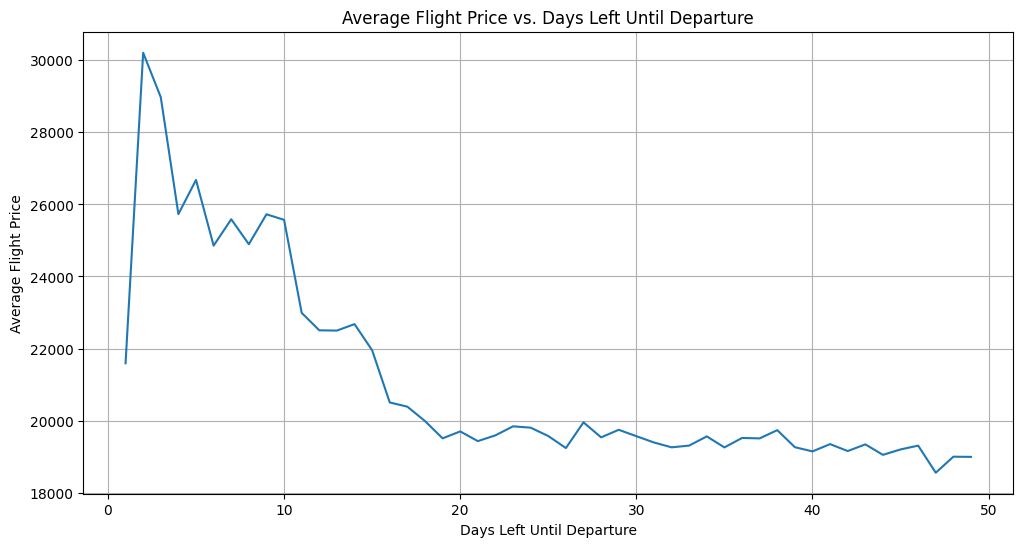

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price_by_days_left = df_flights.groupby('days_left')['price'].mean().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_price_by_days_left.index, y=average_price_by_days_left.values)
plt.title('Average Flight Price vs. Days Left Until Departure')
plt.xlabel('Days Left Until Departure')
plt.ylabel('Average Flight Price')
plt.grid(True)
plt.show()

## Recommend best booking window


Recommend an optimal booking window to avoid high prices based on the price variation analysis.


In [7]:
df_delhi_mumbai = df_flights[(df_flights['source_city'] == 'Delhi') & (df_flights['destination_city'] == 'Mumbai')].copy()

# Ensure 'price' is numerical
df_delhi_mumbai['price'] = pd.to_numeric(df_delhi_mumbai['price'], errors='coerce')

display(df_delhi_mumbai.head())
display(df_delhi_mumbai.info())

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<class 'pandas.core.frame.DataFrame'>
Index: 15289 entries, 0 to 211972
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15289 non-null  int64  
 1   airline           15289 non-null  object 
 2   flight            15289 non-null  object 
 3   source_city       15289 non-null  object 
 4   departure_time    15289 non-null  object 
 5   stops             15289 non-null  object 
 6   arrival_time      15289 non-null  object 
 7   destination_city  15289 non-null  object 
 8   class             15289 non-null  object 
 9   duration          15289 non-null  float64
 10  days_left         15289 non-null  int64  
 11  price             15289 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.5+ MB


None

In [8]:
average_price_by_airline_delhi_mumbai = df_delhi_mumbai.groupby('airline')['price'].mean().sort_values()

print("Average price by airline for Delhi-Mumbai route:")
print(average_price_by_airline_delhi_mumbai)

cheapest_airline_delhi_mumbai = average_price_by_airline_delhi_mumbai.index[0]
premium_airline_delhi_mumbai = average_price_by_airline_delhi_mumbai.index[-1]

print(f"\nConsistently Cheaper Airline (Delhi-Mumbai): {cheapest_airline_delhi_mumbai} (Avg Price: {average_price_by_airline_delhi_mumbai.min():.2f})")
print(f"Consistently Premium Airline (Delhi-Mumbai): {premium_airline_delhi_mumbai} (Avg Price: {average_price_by_airline_delhi_mumbai.max():.2f})")

Average price by airline for Delhi-Mumbai route:
airline
AirAsia       3981.191456
Indigo        4473.739130
SpiceJet      4628.251984
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64

Consistently Cheaper Airline (Delhi-Mumbai): AirAsia (Avg Price: 3981.19)
Consistently Premium Airline (Delhi-Mumbai): Vistara (Avg Price: 26630.29)


In [9]:
print("\nPossible reasons for price differences across airlines on the Delhi-Mumbai route:")
print("- **Class of Travel:** The dataset includes both Economy and Business class flights. Airlines like Vistara and Air India likely offer more Business class options on this route, significantly driving up their average price compared to budget carriers like AirAsia, Indigo, and SpiceJet, which primarily offer Economy class.")
print("- **Service and Amenities:** Premium airlines (like Vistara and Air India) typically offer higher levels of service, better in-flight amenities, and potentially more comfortable seating, which justifies higher prices.")
print("- **Fleet and Aircraft Type:** The type and age of aircraft used can influence operational costs and passenger experience, potentially impacting pricing.")
print("- **Brand Reputation and Market Positioning:** Airlines position themselves differently in the market. Some aim for the budget segment, while others target premium travelers, influencing their pricing strategies.")
print("- **Route Popularity and Demand:** While this is the same route, variations in specific flight times and demand for different airlines' services can also play a role.")


Possible reasons for price differences across airlines on the Delhi-Mumbai route:
- **Class of Travel:** The dataset includes both Economy and Business class flights. Airlines like Vistara and Air India likely offer more Business class options on this route, significantly driving up their average price compared to budget carriers like AirAsia, Indigo, and SpiceJet, which primarily offer Economy class.
- **Service and Amenities:** Premium airlines (like Vistara and Air India) typically offer higher levels of service, better in-flight amenities, and potentially more comfortable seating, which justifies higher prices.
- **Fleet and Aircraft Type:** The type and age of aircraft used can influence operational costs and passenger experience, potentially impacting pricing.
- **Brand Reputation and Market Positioning:** Airlines position themselves differently in the market. Some aim for the budget segment, while others target premium travelers, influencing their pricing strategies.
- **Route



### Data Analysis Key Findings

*   Average flight prices generally increase as the departure date approaches, with a significant price surge observed when there are fewer than approximately 15 days left.
*   On the Delhi-Mumbai route, AirAsia is the consistently cheaper airline with an average price of around \$3981.19.
*   On the Delhi-Mumbai route, Vistara is the consistently premium airline with the highest average price of around \$26630.29.
*   Other airlines like Indigo, SpiceJet, and GO_FIRST fall between Air India and Vistara in terms of average price on the Delhi-Mumbai route.

### Insights or Next Steps

*   The analysis confirms that booking closer to the departure date leads to higher prices, highlighting the importance of booking within the recommended window (15-30 days before departure) to avoid the exponential price surge.
*   Price differences across airlines on the same route are likely driven by factors such as the availability of different travel classes (Economy vs. Business), the level of service and amenities offered, brand positioning, and potentially fleet characteristics. Further analysis could involve comparing prices within the same travel class across airlines to isolate the impact of service differences.


---


Q10. HR Analytics Dataset

a. What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).

b. Are employees with more projects more likely to leave?
Dataset: hr_analytics

In [11]:
url_hr = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/hr_analytics.csv"
df_hr = pd.read_csv(url_hr)

display(df_hr.head())
display(df_hr.info())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


None

In [12]:
print("Missing values in df_hr:")
print(df_hr.isnull().sum())
print("\nData types in df_hr:")
df_hr.info()

Missing values in df_hr:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Data types in df_hr:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-nul

**Reasoning**:
Examine descriptive statistics and visualize numerical columns to identify potential outliers.




Descriptive statistics for numerical columns:
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.0000

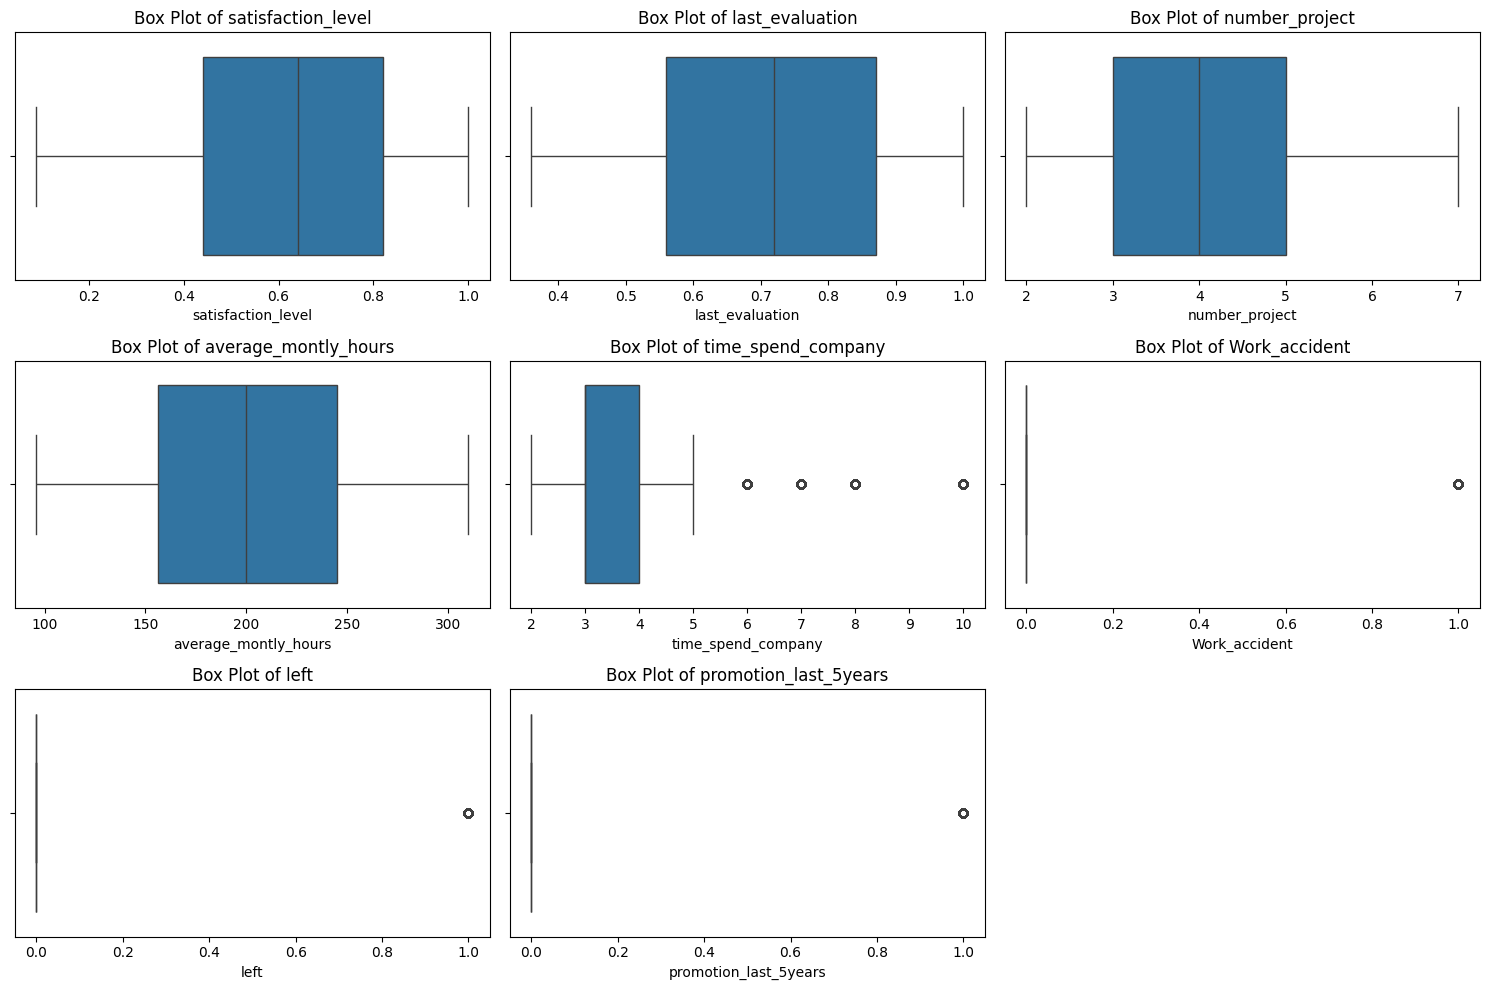

In [13]:
print("\nDescriptive statistics for numerical columns:")
print(df_hr.describe())

import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_hr.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_hr[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [14]:
numerical_cols = df_hr.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_hr[numerical_cols].corr()
left_correlations = correlation_matrix['left'].drop('left')

print("Correlation coefficients with 'left' (Attrition):")
print(left_correlations)

Correlation coefficients with 'left' (Attrition):
satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
promotion_last_5years   -0.061788
Name: left, dtype: float64


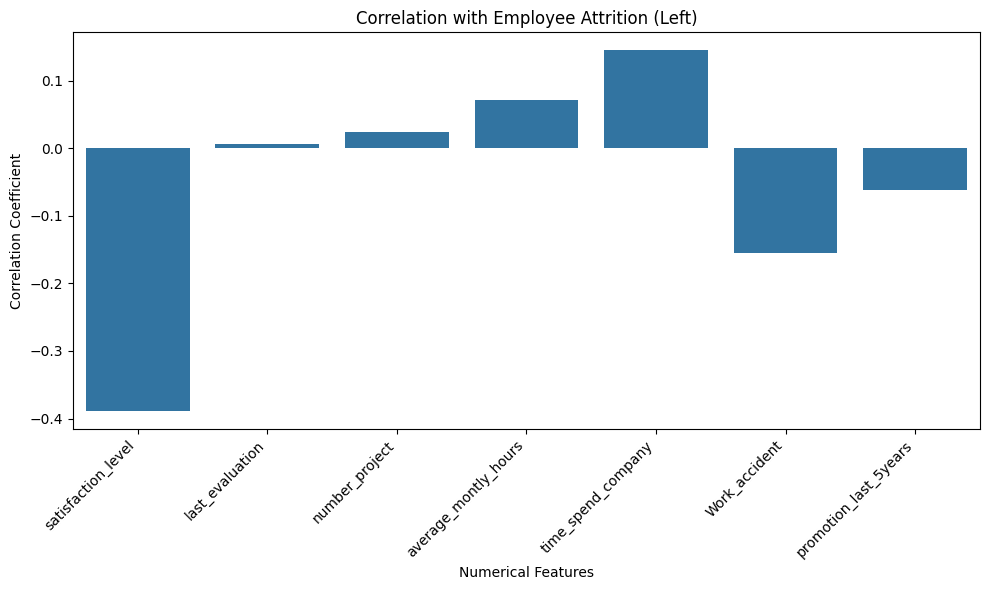

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=left_correlations.index, y=left_correlations.values)
plt.title('Correlation with Employee Attrition (Left)')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
left_correlations_abs = left_correlations.abs().sort_values(ascending=False)

print("Factors most strongly correlated with employee attrition ('left'):")
display(left_correlations_abs)

# Identify key drivers based on the sorted absolute correlations
# We can consider factors with an absolute correlation above a certain threshold, or just list the top few
key_drivers = left_correlations_abs[left_correlations_abs > 0.1].index.tolist() # Example: threshold 0.1

print("\nKey drivers of attrition based on correlation strength (> 0.1 absolute correlation):")
print(key_drivers)


Factors most strongly correlated with employee attrition ('left'):


,left
satisfaction_level,0.388375
Work_accident,0.154622
time_spend_company,0.144822
average_montly_hours,0.071287
promotion_last_5years,0.061788
number_project,0.023787
last_evaluation,0.006567



Key drivers of attrition based on correlation strength (> 0.1 absolute correlation):
['satisfaction_level', 'Work_accident', 'time_spend_company']


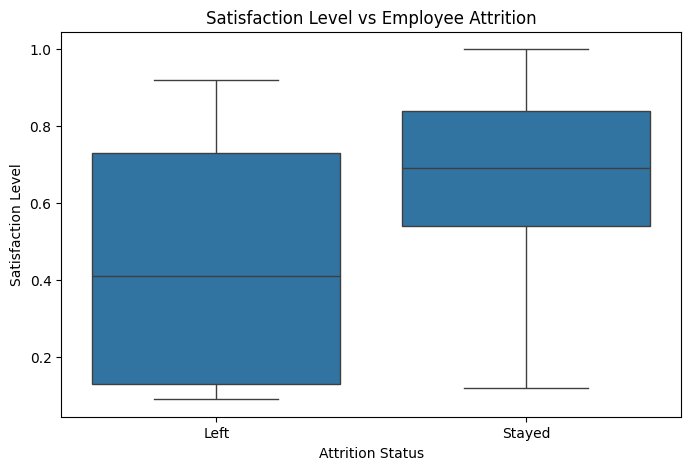

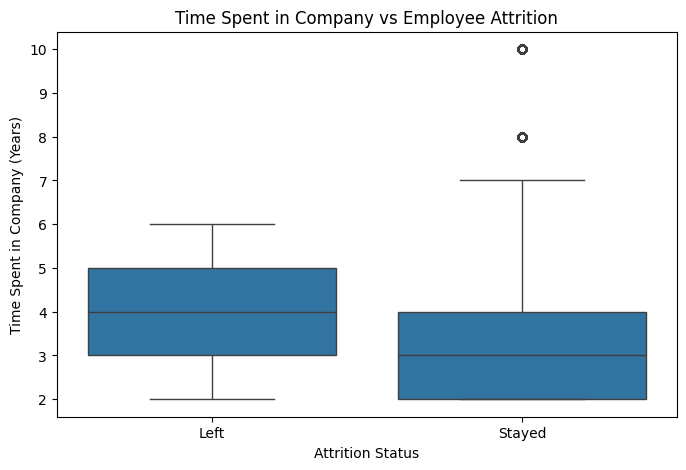

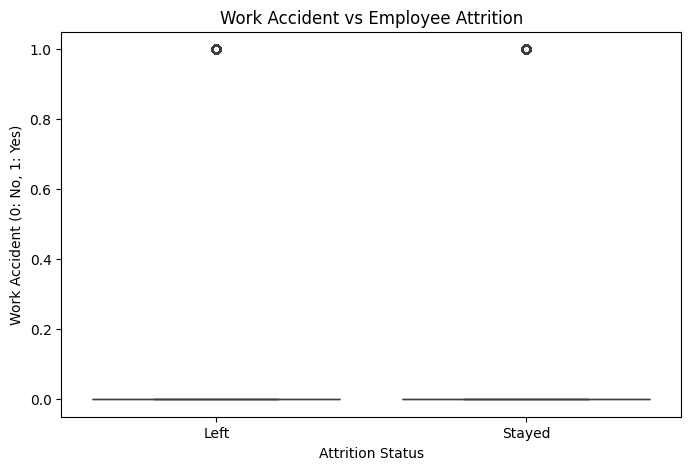

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename 'left' column for better visualization labels
df_hr['Attrition'] = df_hr['left'].map({0: 'Stayed', 1: 'Left'})

# Plotting satisfaction_level vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='satisfaction_level', data=df_hr)
plt.title('Satisfaction Level vs Employee Attrition')
plt.xlabel('Attrition Status')
plt.ylabel('Satisfaction Level')
plt.show()

# Plotting time_spend_company vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='time_spend_company', data=df_hr)
plt.title('Time Spent in Company vs Employee Attrition')
plt.xlabel('Attrition Status')
plt.ylabel('Time Spent in Company (Years)')
plt.show()

# Plotting Work_accident vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='Work_accident', data=df_hr)
plt.title('Work Accident vs Employee Attrition')
plt.xlabel('Attrition Status')
plt.ylabel('Work Accident (0: No, 1: Yes)')
plt.show()

In [18]:
attrition_rate_by_projects = df_hr.groupby('number_project')['left'].mean()
print("Attrition rate by number of projects:")
print(attrition_rate_by_projects)

Attrition rate by number of projects:
number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64


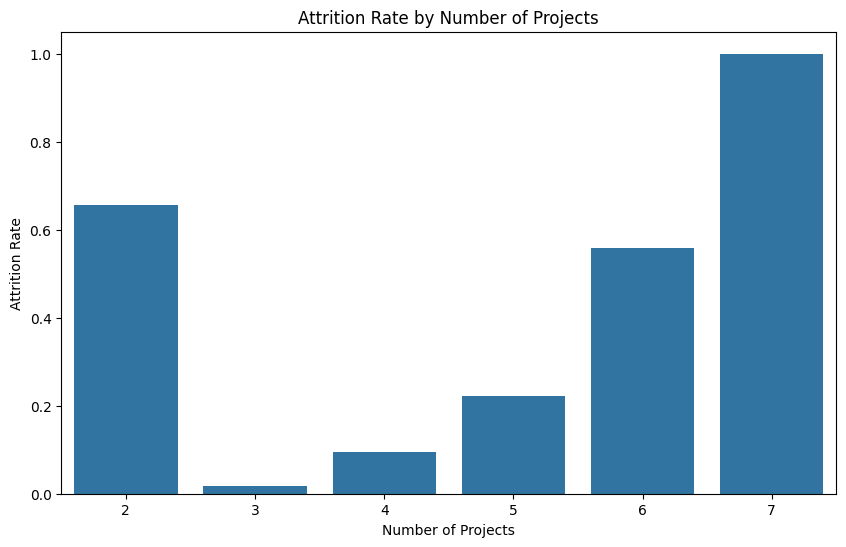

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_projects.index, y=attrition_rate_by_projects.values)
plt.title('Attrition Rate by Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Attrition Rate')
plt.show()

In [20]:
child_survival_rate = survival_rate_by_age_group['Child']
adult_survival_rate = survival_rate_by_age_group['Adult']

if child_survival_rate > adult_survival_rate:
  print(f"Children had a better chance of survival than adults.")
else:
  print(f"Adults had a better chance of survival than children.")

NameError: name 'survival_rate_by_age_group' is not defined

**Reasoning**:
Re-calculate the survival rate by age group and then compare the survival rates of children and adults, printing the comparison result.



In [21]:
import numpy as np

df_titanic['AgeGroup'] = np.where(df_titanic['Age'] < 18, 'Child', 'Adult')

survival_rate_by_age_group = df_titanic.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by Age Group:")
print(survival_rate_by_age_group)

child_survival_rate = survival_rate_by_age_group['Child']
adult_survival_rate = survival_rate_by_age_group['Adult']

if child_survival_rate > adult_survival_rate:
  print(f"Children had a better chance of survival than adults.")
else:
  print(f"Adults had a better chance of survival than children.")

NameError: name 'df_titanic' is not defined

**Reasoning**:
Reload the titanic dataset, preprocess the age column, calculate the survival rate by age group, and then compare the survival rates of children and adults, printing the comparison result.



In [22]:
import pandas as pd
import numpy as np

url_titanic = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv"
df_titanic = pd.read_csv(url_titanic)

median_age = df_titanic['Age'].median()
df_titanic['Age'].fillna(median_age, inplace=True)

df_titanic['AgeGroup'] = np.where(df_titanic['Age'] < 18, 'Child', 'Adult')

survival_rate_by_age_group = df_titanic.groupby('AgeGroup')['Survived'].mean()
print("Survival rate by Age Group:")
print(survival_rate_by_age_group)

child_survival_rate = survival_rate_by_age_group['Child']
adult_survival_rate = survival_rate_by_age_group['Adult']

if child_survival_rate > adult_survival_rate:
  print(f"Children had a better chance of survival than adults.")
else:
  print(f"Adults had a better chance of survival than children.")

Survival rate by Age Group:
AgeGroup
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64
Children had a better chance of survival than adults.


/tmp/ipython-input-330501829.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(median_age, inplace=True)


In [23]:
print("Comparison of attrition rates by number of projects:")
print(attrition_rate_by_projects)

print("\nAnalysis:")
print("Examining the attrition rates by the number of projects:")
print("- Employees with 2 projects have a relatively high attrition rate (around 65.6%).")
print("- Employees with 3, 4, and 5 projects have significantly lower attrition rates (around 1.8%, 9.4%, and 22.2% respectively).")
print("- Employees with 6 projects have a high attrition rate (around 55.8%).")
print("- Employees with 7 projects have a 100% attrition rate.")

print("\nConclusion regarding whether employees with more projects are more likely to leave:")
print("Based on this analysis, it appears that employees with a very high number of projects (6 or 7) are indeed more likely to leave. However, the relationship is not strictly linear; employees with a moderate number of projects (3, 4, 5) have lower attrition rates than those with fewer projects (2). The highest attrition rates are observed at the extremes (2 and 7 projects) and also for 6 projects.")

Comparison of attrition rates by number of projects:
number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64

Analysis:
Examining the attrition rates by the number of projects:
- Employees with 2 projects have a relatively high attrition rate (around 65.6%).
- Employees with 3, 4, and 5 projects have significantly lower attrition rates (around 1.8%, 9.4%, and 22.2% respectively).
- Employees with 6 projects have a high attrition rate (around 55.8%).
- Employees with 7 projects have a 100% attrition rate.

Conclusion regarding whether employees with more projects are more likely to leave:
Based on this analysis, it appears that employees with a very high number of projects (6 or 7) are indeed more likely to leave. However, the relationship is not strictly linear; employees with a moderate number of projects (3, 4, 5) have lower attrition rates than those with fewer projects (2). The highest attrition rates are observe

## Present findings and insights

### Subtask:
Present findings and insights


**Reasoning**:
Synthesize the findings from the correlation analysis and the attrition rate by projects analysis to provide insights into the key drivers of employee attrition.



In [24]:
print("### Data Analysis Key Findings on Employee Attrition")

print("\n**Correlation Analysis with Attrition ('left'):**")
# Using the previously calculated left_correlations and left_correlations_abs
print("Factors with the strongest absolute correlation with attrition are:")
display(left_correlations_abs)
print(f"- **Satisfaction Level:** Has the strongest negative correlation (-0.388), indicating that employees with lower satisfaction are much more likely to leave.")
print(f"- **Work Accident:** Has a negative correlation (-0.155), suggesting that employees who have had a work accident are slightly less likely to leave (perhaps due to support or recovery period).")
print(f"- **Time Spent in Company:** Has a positive correlation (0.145), indicating that employees who have spent more time in the company are somewhat more likely to leave.")
print(f"- **Average Monthly Hours:** Has a weak positive correlation (0.071), suggesting slightly higher hours might be related to leaving.")
print(f"- **Number of Projects:** Has a very weak positive correlation (0.024). While the correlation is weak overall, the detailed analysis below shows a more complex relationship.")

print("\n**Attrition Rate by Number of Projects:**")
# Using the previously calculated attrition_rate_by_projects
print("Attrition rate varies significantly with the number of projects:")
display(attrition_rate_by_projects)
print("- Employees with **2 projects** have a high attrition rate (around 65.6%). This could indicate underutilization or dissatisfaction with limited work.")
print("- Employees with **3, 4, and 5 projects** have significantly lower attrition rates (around 1.8%, 9.4%, and 22.2% respectively). This suggests a moderate number of projects is associated with lower attrition.")
print("- Employees with **6 projects** have a high attrition rate (around 55.8%). This, along with the 7-project rate, points to potential burnout or excessive workload.")
print("- Employees with **7 projects** have a 100% attrition rate. This is a strong indicator of extreme workload and likely burnout.")

print("\n### Insights into Key Drivers of Attrition")
print("Based on the analysis, several factors appear to be key drivers of employee attrition:")
print("- **Low Satisfaction Level:** This is the strongest predictor of attrition. Employees who are unhappy are significantly more likely to leave.")
print("- **Time Spent in Company:** Employees who have been with the company for a longer period show a slightly higher propensity to leave. This could be related to career stagnation or seeking new opportunities after gaining experience.")
print("- **Workload Extremes (Number of Projects):** The relationship between the number of projects and attrition is not linear but U-shaped. Both having too few projects (potentially indicating boredom or lack of engagement) and having too many projects (leading to burnout and stress) are associated with higher attrition rates. The highest risk of leaving is for employees with very few (2) or very many (6 or 7) projects.")
print("- **Work Accident:** Unexpectedly, having a work accident is negatively correlated with attrition. This might suggest that employees who experience accidents receive support that influences their decision to stay, or perhaps it's a confounding factor that requires further investigation.")
print("\nOther factors like average monthly hours and promotion in the last 5 years show weaker correlations but can still contribute to the overall picture of employee retention.")


### Data Analysis Key Findings on Employee Attrition

**Correlation Analysis with Attrition ('left'):**
Factors with the strongest absolute correlation with attrition are:


,left
satisfaction_level,0.388375
Work_accident,0.154622
time_spend_company,0.144822
average_montly_hours,0.071287
promotion_last_5years,0.061788
number_project,0.023787
last_evaluation,0.006567


- **Satisfaction Level:** Has the strongest negative correlation (-0.388), indicating that employees with lower satisfaction are much more likely to leave.
- **Work Accident:** Has a negative correlation (-0.155), suggesting that employees who have had a work accident are slightly less likely to leave (perhaps due to support or recovery period).
- **Time Spent in Company:** Has a positive correlation (0.145), indicating that employees who have spent more time in the company are somewhat more likely to leave.
- **Average Monthly Hours:** Has a weak positive correlation (0.071), suggesting slightly higher hours might be related to leaving.
- **Number of Projects:** Has a very weak positive correlation (0.024). While the correlation is weak overall, the detailed analysis below shows a more complex relationship.

**Attrition Rate by Number of Projects:**
Attrition rate varies significantly with the number of projects:


,left
number_project,
2,0.656198
3,0.017756
4,0.093700
5,0.221659
6,0.557922
7,1.000000


- Employees with **2 projects** have a high attrition rate (around 65.6%). This could indicate underutilization or dissatisfaction with limited work.
- Employees with **3, 4, and 5 projects** have significantly lower attrition rates (around 1.8%, 9.4%, and 22.2% respectively). This suggests a moderate number of projects is associated with lower attrition.
- Employees with **6 projects** have a high attrition rate (around 55.8%). This, along with the 7-project rate, points to potential burnout or excessive workload.
- Employees with **7 projects** have a 100% attrition rate. This is a strong indicator of extreme workload and likely burnout.

### Insights into Key Drivers of Attrition
Based on the analysis, several factors appear to be key drivers of employee attrition:
- **Low Satisfaction Level:** This is the strongest predictor of attrition. Employees who are unhappy are significantly more likely to leave.
- **Time Spent in Company:** Employees who have been with the company for a lon


### Data Analysis Key Findings

*   **Key Drivers of Attrition:** The factors with the strongest absolute correlation to employee attrition are `satisfaction_level` (-0.388), `Work_accident` (-0.155), and `time_spend_company` (0.145).
*   **Satisfaction Level:** Employees with lower satisfaction levels are significantly more likely to leave (strongest negative correlation).
*   **Time Spent in Company:** Employees who have spent more time with the company are somewhat more likely to leave.
*   **Work Accident:** Employees who have experienced a work accident are slightly *less* likely to leave.
*   **Attrition Rate by Number of Projects:** The relationship is not linear.
    *   Employees with 2 projects have a high attrition rate (65.6%).
    *   Employees with 3, 4, and 5 projects have significantly lower attrition rates (1.8%, 9.4%, and 22.2% respectively).
    *   Employees with 6 projects have a high attrition rate (55.8%).
    *   Employees with 7 projects have a 100% attrition rate.

### Insights or Next Steps

*   Employee attrition is primarily driven by low satisfaction and workload extremes (both too few and too many projects). A moderate number of projects (3-5) is associated with the lowest attrition risk.
*   Investigate the reasons behind the unexpected negative correlation between work accidents and attrition; it might suggest support systems are effective or reveal other confounding factors.


---